In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
cnn=tf.keras.models.load_model('/content/tranining2 (1).h5')

##Performing prediction on single image

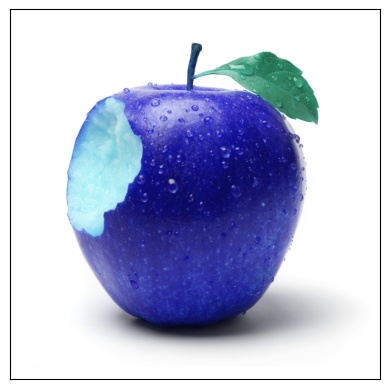

In [13]:
import cv2
image_path='/content/drive/MyDrive/Fruits&veggies_dataset.zip (Unzipped Files)/test/apple/Image_1.jpg'
img=cv2.imread(image_path)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

###Model Testing

In [14]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 500ms/step


In [15]:
print(predictions[0])

[9.99993563e-01 2.87567892e-19 4.11205445e-11 7.40057529e-11
 2.24559808e-24 1.52780194e-06 9.62449825e-12 1.86564062e-16
 9.22209531e-12 1.03130735e-16 5.33556183e-22 3.66365428e-19
 4.39537308e-18 9.52806435e-18 3.24908134e-12 2.05612877e-14
 1.28023577e-16 2.25059698e-17 1.85869387e-23 5.72990488e-10
 1.49245918e-13 1.98549009e-13 4.56556108e-06 5.33474320e-16
 1.45967864e-24 1.83992841e-16 1.21432420e-09 7.17226083e-13
 2.13570142e-13 1.81346838e-18 1.13744947e-24 1.27320674e-18
 8.99712813e-13 3.14048492e-07 1.22264392e-17 7.75390585e-10]


In [2]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits&veggies_dataset.zip (Unzipped Files)/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [17]:
result_index=np.where(predictions[0]==max(predictions[0]))
print(result_index[0])

[0]


In [18]:
test_set.class_names[result_index[0][0]]

'apple'

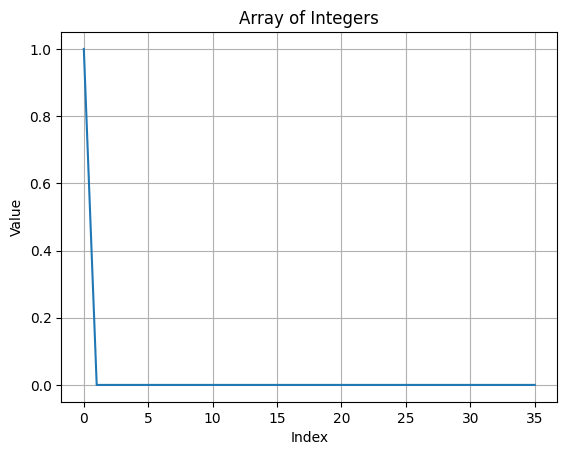

In [24]:
plt.plot(predictions[0])
plt.title('Array of Integers')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

###Checking for grapes and others

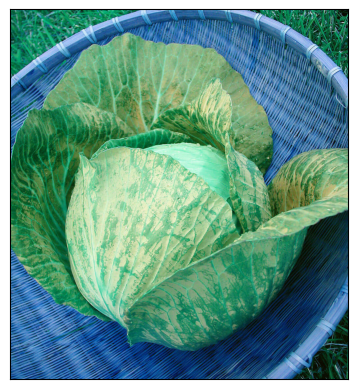

In [38]:
import cv2
#image_path='/content/drive/MyDrive/Fruits&veggies_dataset.zip (Unzipped Files)/test/grapes/Image_1.jpg'
image_path='/content/drive/MyDrive/Fruits&veggies_dataset.zip (Unzipped Files)/test/cabbage/Image_1.jpg'
img=cv2.imread(image_path)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [39]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 37ms/step


In [3]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [41]:
predictions[0]

array([1.9347592e-16, 1.9458998e-15, 4.7077841e-20, 2.2803945e-09,
       9.9997211e-01, 1.3432391e-09, 6.3237222e-18, 1.7431044e-13,
       3.5700806e-10, 1.2118759e-12, 6.4558900e-11, 4.1985583e-14,
       8.4744935e-15, 4.9231329e-19, 1.8015300e-09, 2.1585094e-05,
       4.8859848e-12, 1.1240926e-12, 2.6560615e-06, 1.3820937e-15,
       5.1087220e-16, 5.1244557e-15, 1.7132256e-16, 9.9550004e-16,
       2.1783823e-07, 2.4173655e-14, 3.1484905e-20, 1.1132814e-19,
       2.8785754e-15, 1.6203088e-12, 3.4550212e-06, 2.2860257e-16,
       4.0157935e-22, 3.8436665e-15, 3.1364492e-16, 7.2131016e-12],
      dtype=float32)

In [43]:
result_index1=np.where(predictions[0]==max(predictions[0]))
print(result_index1[0][0])

4


In [46]:
print("Its a {}".format(test_set.class_names[result_index1[0][0]]))

Its a cabbage


In [19]:
file=open("labels.txt",'w')
for i in test_set.class_names:
  file.write(i+"\n")
file.close()

In [20]:
with open('labels.txt') as f:
  content=f.readlines()


In [21]:
content

['apple\n',
 'banana\n',
 'beetroot\n',
 'bell pepper\n',
 'cabbage\n',
 'capsicum\n',
 'carrot\n',
 'cauliflower\n',
 'chilli pepper\n',
 'corn\n',
 'cucumber\n',
 'eggplant\n',
 'garlic\n',
 'ginger\n',
 'grapes\n',
 'jalepeno\n',
 'kiwi\n',
 'lemon\n',
 'lettuce\n',
 'mango\n',
 'onion\n',
 'orange\n',
 'paprika\n',
 'pear\n',
 'peas\n',
 'pineapple\n',
 'pomegranate\n',
 'potato\n',
 'raddish\n',
 'soy beans\n',
 'spinach\n',
 'sweetcorn\n',
 'sweetpotato\n',
 'tomato\n',
 'turnip\n',
 'watermelon\n']